# Logistic Map
## Packages and Config

In [65]:
using Plots, LaTeXStrings
using Statistics: mean
using StatsBase: countmap
figpath = "fig/"
Plots.default(fontfamily="Computer Modern", titlefontsize=16, tickfontsize=8, labelfontsize=12,
    ms=0.5, msw=0, legend=false, color=:black, marker=:rect, alpha=0.25,
    xlabel=L"r", ylabel=L"x_n",)

## Vectorized Logistic Map

In [66]:
"""
A vectorized logistic map function
"""
function logisticmap(x::Matrix{<:Number}, r::Vector{<:Number})
    return r .* x .* (1 .- x)
end

logisticmap

## Bifurcation Diagram

In [67]:
rcount = 2001
rs = collect(range(0.0, 4.0, length=rcount))

2001-element Vector{Float64}:
 0.0
 0.002
 0.004
 0.006
 0.008
 0.01
 0.012
 0.014
 0.016
 0.018
 ⋮
 3.984
 3.986
 3.988
 3.99
 3.992
 3.994
 3.996
 3.998
 4.0

### Animation

┌ Info: Saved animation to 
│   fn = d:\University\Computational Physics\Assignments\ps9-differential-equations\bifurcation.gif
└ @ Plots C:\Users\SLHHe\.julia\packages\Plots\FCM0H\src\animation.jl:114


Plots.AnimatedGif("d:\\University\\Computational Physics\\Assignments\\ps9-differential-equations\\bifurcation.gif")
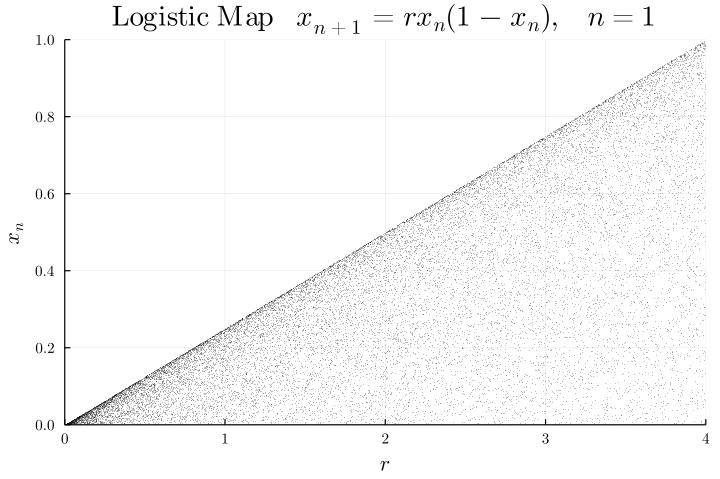

In [68]:
xs = rand(rcount, 10)
anim = @animate for n in 1:50
    global xs = logisticmap(xs, rs)
    scatter(rs, xs, ms=0.5, msw=0, xlims=(0.0, 4.0), ylims = (0, 1), marker=:rect,
        legend=false, color=:black, alpha=0.25, xlabel=L"r", ylabel=L"x_n",
        title="\$\\textrm{Logistic\\ Map}\\quad x_{n+1} = rx_n(1-x_n),\\quad n=$n\$",
        dpi=120)
end
gif(anim, "bifurcation.gif", fps=10)

### Plot

In [69]:
xs = rand(rcount, 100)
for _ in 1:10^5
    xs = logisticmap(xs, rs)
end

In [70]:
p = scatter(rs, xs, xlims=(0.0, 4.0), ylims = (0, 1), dpi=200,
    title="\$\\textrm{Logistic\\ Map}\\quad x_{n+1} = rx_n(1-x_n),\\quad n=10^5\$")
savefig(figpath * "bifurcation")

### Zoomed Plot

In [74]:
rzoom = collect(range(2.9, 4.0, length = round(Integer, 1.1(rcount-1)) + 1))
xs = rand(round(Integer, 1.1rcount), 100)
for _ in 1:10^5
    xs = logisticmap(xs, rzoom)
end

In [75]:
p = scatter(rzoom, xs, xlims=(2.9, 4.0), ylims = (0, 1), dpi=200,
    title="\$\\textrm{Logistic\\ Map}\\quad x_{n+1} = rx_n(1-x_n),\\quad n=10^5\$")
savefig(p, figpath * "bifurcation-zoom")

## Feigenbaum constants
### 

### First Constant $\delta$

In [90]:
xs = rand(3001, 256)
rbifurcate = collect(range(3.54, 3.57, length=3001))
for _ in 1:10^5
    xs = logisticmap(xs, rbifurcate)
end

In [108]:
# find where 8 bifurcates into 16 and where 16 bifurcates into 32
aₙ₋₂index = findfirst(n -> length(unique(round.(xs[n, :], digits=6))) == 8, 1:3001)
aₙ₋₁index = findfirst(n -> length(unique(round.(xs[n, :], digits=6))) == 16, 1:3001)
aₙindex = findfirst(n -> length(unique(round.(xs[n, :], digits=6))) == 32, 1:3001)
δ = (rbifurcate[aₙ₋₁index] - rbifurcate[aₙ₋₂index]) / (rbifurcate[aₙindex] - rbifurcate[aₙ₋₁index])

println("δ = ", δ)
println("aₙ₋₂ = ", rbifurcate[aₙ₋₂index])
println("aₙ₋₁ = ", rbifurcate[aₙ₋₁index])
println("aₙ = ", rbifurcate[aₙindex])

δ = 4.66896551724136
aₙ₋₂ = 3.54411
aₙ₋₁ = 3.56442
aₙ = 3.56877


### Second Constant $\alpha$

In [139]:
xs = rand(3001, 128)
rbifurcate = collect(range(3.54, 3.57, length=3001))
for _ in 1:10^4
    xs = logisticmap(xs, rbifurcate)
end

In [143]:
# find the width of the 8 point tine and a 16 point tine point tines
firsttine = findlast(n -> length(unique(round.(xs[n, :], digits=6))) == 8, 1:3001)
secondtine = findlast(n -> length(unique(round.(xs[n, :], digits=6))) == 16, 1:3001)
firstxs = unique(round.(xs[firsttine, :], digits=6))
secondxs = unique(round.(xs[secondtine, :], digits=6))

endings = partialsortperm(firstxs, 3:4)
firstwidth = firstxs[endings[2]] - firstxs[endings[1]]
endings = partialsortperm(secondxs, 5:6)
secondwidth = secondxs[endings[2]] - secondxs[endings[1]]

firstwidth / secondwidth

2.5090815762457526